# Import von libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy.fft as fft
import scipy.signal as signal

# FT von Rechtecksfunktion -> sinc


<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_73203/3381217570.py:15: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('k ($2\pi$)')


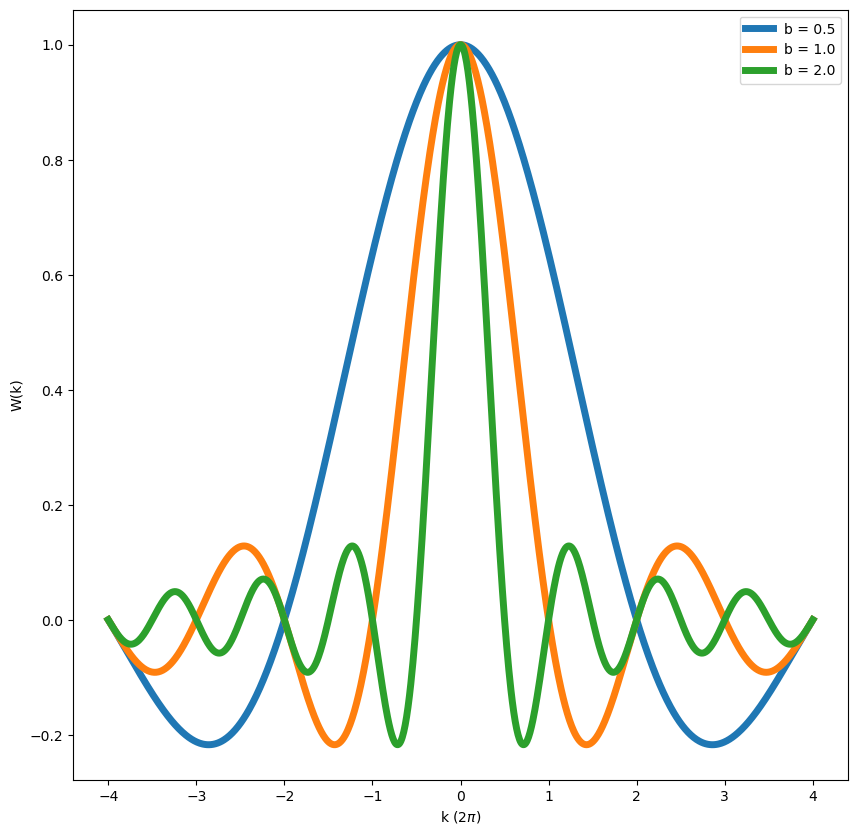

In [7]:
def sinc(ks, b):
# this receives k in multiples of 2 pi,
# so we have to take that into account
    ks = ks * np.pi*2 # need to calculate it
    return np.sin(ks * b / 2) / (ks * b / 2)


ks = np.linspace(-4,4, 1000) # k in multiple of 2 pi

fig, ax = plt.subplots(1,1, figsize = (10,10))


for b in [0.5,1,2]:
    ax.plot(ks, sinc(ks,b),lw =5, label = f'b = {b:0.1f}')
    ax.set_xlabel('k ($2\pi$)')
    ax.set_ylabel('W(k)')
    ax.legend()
plt.show()

# Erzeugen der Rechtecksfunktion

In [8]:
x_lim = 10 # lower and upper boundary of the x-array
density_per_x = 10 # number of points in 1 x unit,
# this determines the maximum possible |k|-values
half_width = 1 # b / 2 = half width so b = 2 * half_width
b = 2 * half_width # calculate the b
xs = np.linspace(-x_lim, x_lim, 2*x_lim*density_per_x +1) #

rectangle = np.zeros_like(xs) # create zeros of same shape as xs
center = rectangle.shape[0]//2 # center index of the rectangle
# now populate the rectangle with non-zero intensity,
# note the normalization factor of the intensity
rectangle[center-half_width * density_per_x: center+half_width*density_per_x] = 1 / (half_width*2*density_per_x)

# FT der Rechtecksfunktion




In [9]:
# now perform FT
fouriersignal = fft.fft(rectangle)
# we can shift the zero frequencie signal to the center of the array
#fouriersignal = fft.fftshift(fouriersignal)
freqs = fft.fftfreq(xs.shape[0], xs[-1]- xs[-2])
# shift the zero frequency to the center of the array
#freqs = fft. fftshift(freqs)

# Plot


<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_73203/3695193981.py:15: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('k ($2\pi$)')
/tmp/ipykernel_73203/3695193981.py:26: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('k ($2\pi$)')


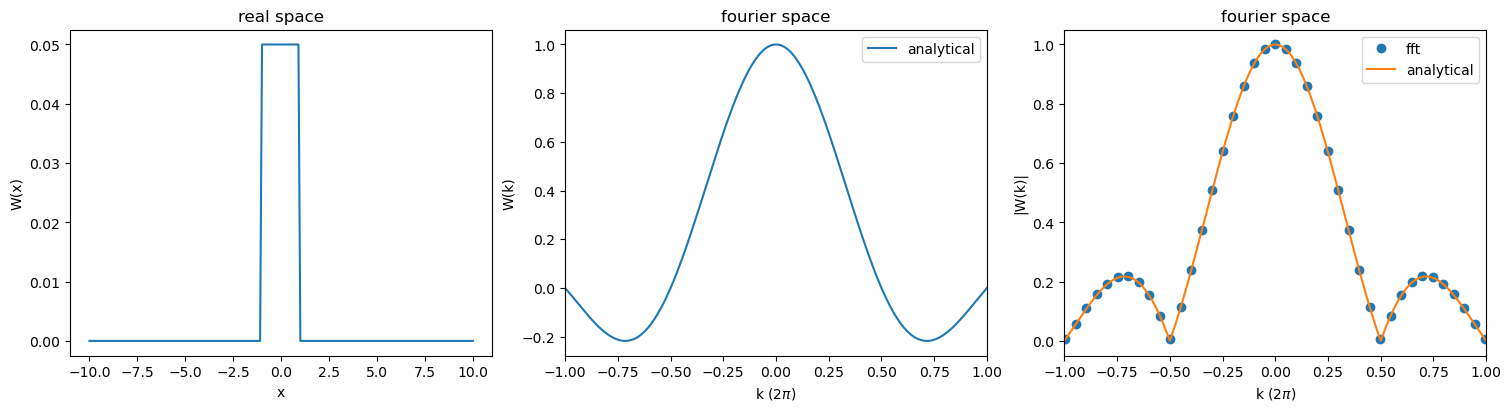

In [10]:

fig, axes = plt.subplots(1,3, figsize = (15,4), \
constrained_layout = True)
# plot the rectangle function
ax = axes[0]
ax.set_title('real space')
ax.plot(xs, rectangle)
ax.set_xlabel('x')
ax.set_ylabel('W(x)')

# now plot the FT
ax = axes[1]
ax.set_title('fourier space')
ax.plot(ks, (sinc(ks, b)), label = 'analytical')
ax.set_xlim(-1,1)
ax.set_xlabel('k ($2\pi$)')
ax.set_ylabel('W(k)')
ax.legend()

# now plot the FT and fft result, only magnitude (np.abs)
ax = axes[2]
ax.set_title('fourier space')
ax.plot(freqs, np.abs(fouriersignal), ls = '', marker = 'o', \
label = 'fft')
ax.plot(ks, np.abs(sinc(ks, b)), label = 'analytical')
ax.set_xlim(-1,1)
ax.set_xlabel('k ($2\pi$)')
ax.set_ylabel('|W(k)|')
ax.legend()

plt.show()